In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=100)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=100)

In [ ]:
model=models.Sequential()
model.add(layers.Embedding(10000,16))
model.add(layers.LSTM(32))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=3,validation_split=0.2)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.6966 - loss: 0.5348 - val_accuracy: 0.8452 - val_loss: 0.3514
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8973 - loss: 0.2620 - val_accuracy: 0.8442 - val_loss: 0.3692
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.9286 - loss: 0.1936 - val_accuracy: 0.8448 - val_loss: 0.3853


In [ ]:
model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8381 - loss: 0.4003


[0.3951806128025055, 0.8406400084495544]

In [ ]:
import matplotlib.pyplot as plt

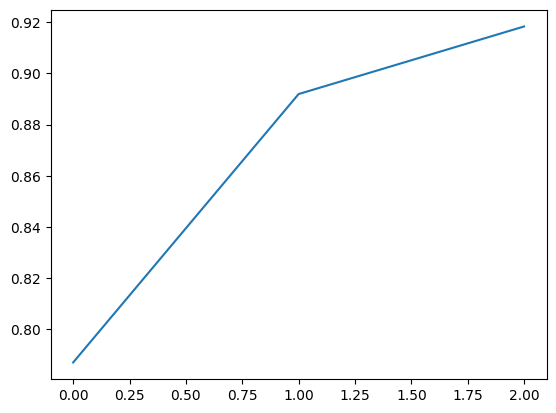

In [ ]:
plt.plot(history.history['accuracy'],label=['Accuracy'])

In [ ]:
def pred_sentiment(text):
  word_idx=tf.keras.datasets.imdb.get_word_index()
  word_idx={k:(v+3) for k,v in word_idx.items()}
  word_idx['<PAD>']=0
  word_idx['<START>']=1
  word_idx['<UNK>']=2
  word_idx['<UNUSED>']=3
  text=text.lower()
  words=text.split()
  seq=[1]
  for word in words:
    seq.append(word_idx.get(word,2))
  seq=pad_sequences([seq],maxlen=100)
  prediction=model.predict(seq)[0][0]
  sentiment = "Positive" if prediction > 0.5 else "Negative"
  # print(f"Sentiment: {sentiment} ({prediction:.4f})")
  return sentiment, prediction


In [ ]:
pred_sentiment("Amazing movie")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


('Positive', np.float32(0.82376426))

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_node(0, text="The movie was wonderful and thrilling!")
G.add_node(1, text="It was a boring and slow film.")
G.add_node(2, text="Absolutely loved it!")
G.add_node(3, text="Terrible acting and poor direction.")
G.add_edges_from([(0, 2), (1, 3)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


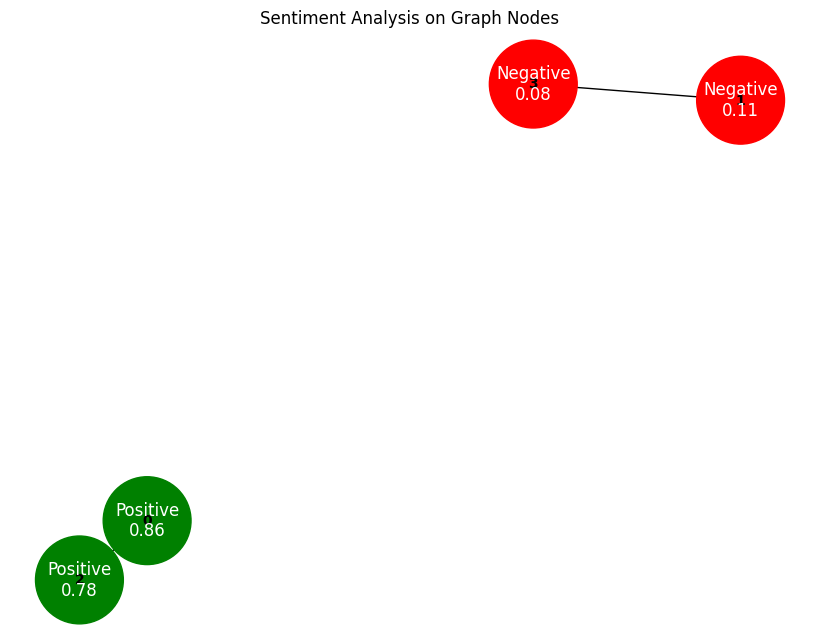

In [ ]:
colors = []
labels = {}

for node in G.nodes:
    text = G.nodes[node]['text']
    sentiment, score = pred_sentiment(text)
    G.nodes[node]['sentiment'] = sentiment
    labels[node] = f"{sentiment}\n{score:.2f}"
    colors.append('green' if sentiment == "Positive" else 'red')

# -------- Plot Graph --------
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=4000, font_size=10, font_weight='bold')
nx.draw_networkx_labels(G, pos, labels=labels, font_color='white')
plt.title("Sentiment Analysis on Graph Nodes")
plt.show()

In [ ]:
colors=[]
labels={}
for node in G.nodes:
  text=G.nodes[node]['text']
  sentiment,score=pred_sentiment(text)
  G.nodes[node]['sentiment']
  labels[node]=f'{sentiment}\n{score:.2f}'
  colors.append('green' if sentiment=='Positive' else 'red')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


{0: Text(-0.24885328554345088, -0.7708791424335, 'Positive\n0.86'),
 1: Text(0.3989354980441616, 0.8542749456074866, 'Negative\n0.11'),
 2: Text(-0.3227459121655546, -0.9999999999999999, 'Positive\n0.78'),
 3: Text(0.17266369966484382, 0.9166041968260132, 'Negative\n0.08')}

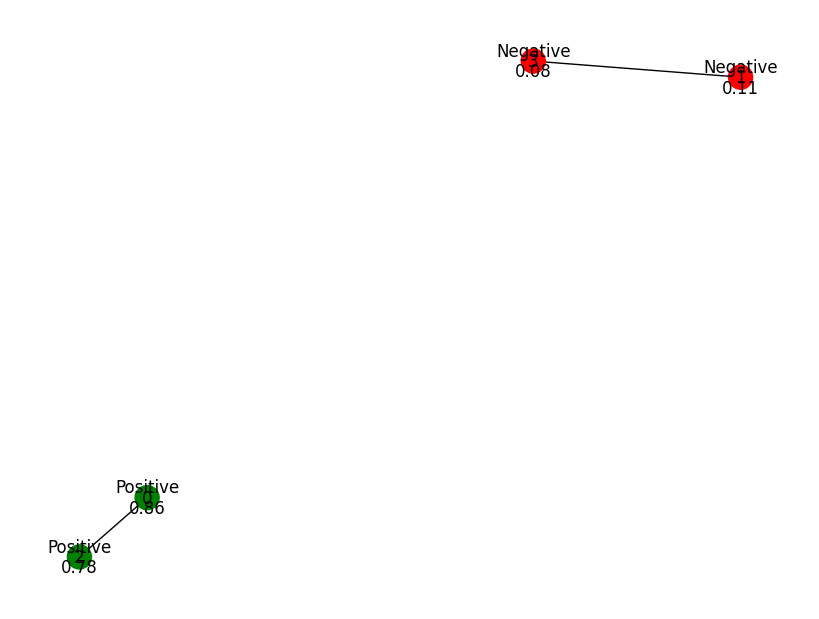

In [ ]:
pos1=nx.spring_layout(G,seed=42)
plt.figure(figsize=(8,6))
nx.draw(G,pos1,with_labels=True,node_color=colors)
nx.draw_networkx_labels(G,pos1,labels=labels)


In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0


In [ ]:
y_test=y_test.reshape(-1,)
y_train=y_train.reshape(-1,)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
def create_model(optimizer,dropout):
  model=models.Sequential()
  model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128,activation='relu'))
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(10,activation='softmax'))

  model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
opti=tf.keras.optimizers.Adam(learning_rate=0.001)
model=create_model(opti,0.2)

In [ ]:
hist=model.fit(x_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 50ms/step - accuracy: 0.2871 - loss: 1.8975 - val_accuracy: 0.4982 - val_loss: 1.3915
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.5093 - loss: 1.3515 - val_accuracy: 0.5443 - val_loss: 1.2753
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.5704 - loss: 1.1982 - val_accuracy: 0.5986 - val_loss: 1.1316
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.6168 - loss: 1.0804 - val_accuracy: 0.6349 - val_loss: 1.0520
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.6445 - loss: 1.0098 - val_accuracy: 0.6432 - val_loss: 1.0310


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Tweets.csv')

In [ ]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df.dropna(inplace=True)

In [ ]:
text=df.selected_text.values

In [ ]:
text

array(['I`d have responded, if I were going', 'Sooo SAD', 'bullying me',
       ..., 'Where`s my baby?!', 'bad', 'mother of all bad days'],
      dtype=object)

In [ ]:
sentiment=df.sentiment.values
sentiment

array(['neutral', 'negative', 'negative', ..., 'neutral', 'negative',
       'negative'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
y=le.fit_transform(sentiment)

In [ ]:
import  tensorflow as tf
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=10000,oov_token='<OOV>')

In [ ]:
tokenizer.fit_on_texts(text)
sequences=tokenizer.texts_to_sequences(text)
x=tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=100)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Embedding(input_dim = 10000,output_dim=16, input_length=100),
    SimpleRNN(32),
    Dense(3, activation= 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
494/494 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.6173 - loss: 0.8326 - val_accuracy: 0.7466 - val_loss: 0.6040
Epoch 2/5
494/494 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8383 - loss: 0.4445 - val_accuracy: 0.8206 - val_loss: 0.4887
Epoch 3/5
494/494 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8978 - loss: 0.2932 - val_accuracy: 0.8117 - val_loss: 0.5322
Epoch 4/5
494/494 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9362 - loss: 0.2029 - val_accuracy: 0.8069 - val_loss: 0.5729
Epoch 5/5
494/494 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9536 - loss: 0.1478 - val_accuracy: 0.7990 - val_loss: 0.6652


In [ ]:
model.evaluate(X_test,y_test)

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8062 - loss: 0.6279


[0.6297917366027832, 0.8034014701843262]

In [ ]:

def pred_s(t='Hi hello'):

  seq=tokenizer.texts_to_sequences([t])
  seq=tf.keras.preprocessing.sequence.pad_sequences(seq,maxlen=100)
  pred=np.argmax(model.predict(seq),axis=1)
  return pred[0],le.inverse_transform(pred)[0]

In [ ]:
a,b=pred_s('hello')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [ ]:
import numpy as np
np.argmax(model.predict(seq),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([1])

In [ ]:
import networkx as nx

G = nx.Graph()

# Add tweet-like nodes (no emojis)
G.add_node(0, text="Just watched the movie—absolutely thrilling! Loved every moment.")
G.add_node(1, text="That movie was painfully slow and super boring. Total waste of time.")
G.add_node(2, text="I loved it! Such a good film. Highly recommend. #mustwatch")
G.add_node(3, text="The acting was awful and the direction made no sense. Worst film ever.")

# Add edges (e.g., based on similar sentiment)
G.add_edges_from([(0, 2), (1, 3)])


In [ ]:
colors=[]
labels={}
for node in G.nodes:
  text=G.nodes[node]['text']
  score,sentiment=pred_s(text)
  G.nodes[node]['sentiment']=sentiment
  labels[node]=f'{sentiment}\n{(score):.2f}'
  colors.append('green' if sentiment=='Positive' else 'red')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [ ]:
pos=nx.spring_layout(G,seed=42)

{0: Text(-0.24885328554345088, -0.7708791424335, 'positive\n2.00'),
 1: Text(0.3989354980441616, 0.8542749456074866, 'negative\n0.00'),
 2: Text(-0.3227459121655546, -0.9999999999999999, 'positive\n2.00'),
 3: Text(0.17266369966484382, 0.9166041968260132, 'negative\n0.00')}

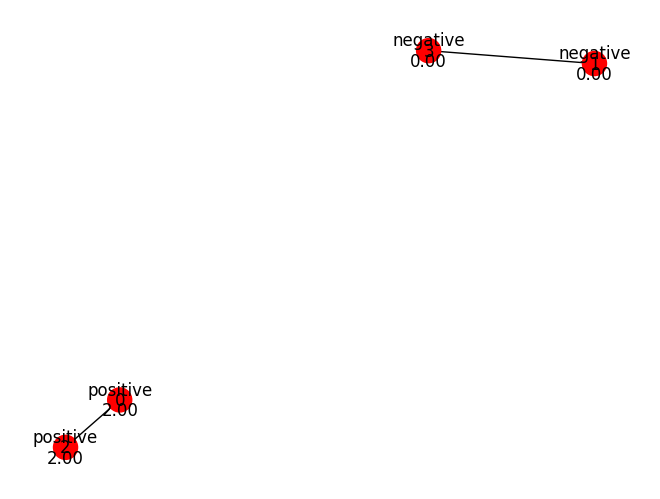

In [ ]:
nx.draw(G,pos,with_labels=True,node_color=colors)
nx.draw_networkx_labels(G,pos,labels=labels)